In [2]:
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.pyplot as plote

from sklearn import preprocessing
from sklearn import cross_validation, metrics
from sklearn.model_selection import train_test_split
from pylab import plot, show, subplot, specgram, imshow, savefig

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


**loading data**

In [3]:
# Reading the dataset
train = pd.ExcelFile("../input/research_student (1) (1).xlsx")
dataset = train.parse('Sheet1', header=0)

In [4]:

dataset.head()

,Branch,Marks[10th],Marks[12th],Gender,Board[10th],Board[12th],Category,GPA 1,Rank,Normalized Rank,CGPA,Current Back,Ever Back,GPA 2,GPA 3,GPA 4,GPA 5,GPA 6,Olympiads Qualified,Technical Projects,Tech Quiz,Engg. Coaching,NTSE Scholarships,Miscellany Tech Events
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CIVIL,77.57,64.6,Male,BSEB Patna,BSEB Patna,OBC,6.29,44718.0,15.970714,6.02,1.0,4.0,6.12,5.94,5.41,6.25,6.13,1.0,4.0,3.0,2.0,0.0,5.0
2,CSE,86.40,71.8,Male,CBSE,CBSE,GEN,6.47,24222.0,8.650714,6.10,1.0,7.0,6.12,5.88,5.53,6.44,6.19,2.0,2.0,0.0,1.0,0.0,4.0
3,CSE,88.14,78.0,Male,ICSE,ICSE,GEN,7.35,24723.0,8.829643,6.65,1.0,1.0,6.35,6.54,6.41,6.50,6.69,1.0,1.0,3.0,0.0,0.0,5.0
4,CSE,65.40,59.8,Female,CBSE,CBSE,ST,6.41,232157.0,82.913214,6.09,1.0,11.0,6.00,5.71,5.24,5.88,6.25,2.0,0.0,2.0,2.0,0.0,1.0


***Removing outliers     ***

In [5]:
dataset = dataset.drop(dataset[dataset['GPA 2']>10].index)


# dropping the NaN values 


In [6]:
dataset = dataset.dropna()

In [7]:
dataset.head()

,Branch,Marks[10th],Marks[12th],Gender,Board[10th],Board[12th],Category,GPA 1,Rank,Normalized Rank,CGPA,Current Back,Ever Back,GPA 2,GPA 3,GPA 4,GPA 5,GPA 6,Olympiads Qualified,Technical Projects,Tech Quiz,Engg. Coaching,NTSE Scholarships,Miscellany Tech Events
1,CIVIL,77.57,64.6,Male,BSEB Patna,BSEB Patna,OBC,6.29,44718.0,15.970714,6.02,1.0,4.0,6.12,5.94,5.41,6.25,6.13,1.0,4.0,3.0,2.0,0.0,5.0
2,CSE,86.40,71.8,Male,CBSE,CBSE,GEN,6.47,24222.0,8.650714,6.10,1.0,7.0,6.12,5.88,5.53,6.44,6.19,2.0,2.0,0.0,1.0,0.0,4.0
3,CSE,88.14,78.0,Male,ICSE,ICSE,GEN,7.35,24723.0,8.829643,6.65,1.0,1.0,6.35,6.54,6.41,6.50,6.69,1.0,1.0,3.0,0.0,0.0,5.0
4,CSE,65.40,59.8,Female,CBSE,CBSE,ST,6.41,232157.0,82.913214,6.09,1.0,11.0,6.00,5.71,5.24,5.88,6.25,2.0,0.0,2.0,2.0,0.0,1.0
5,CSE,81.00,74.0,Male,CBSE,CBSE,GEN,6.80,23252.0,8.304286,6.13,1.0,0.0,6.06,5.88,6.00,5.93,5.44,2.0,0.0,2.0,2.0,0.0,1.0


# separating the dependent and independent variables

In [8]:
target = dataset.CGPA
features = dataset.drop(['CGPA'], axis = 1)

# Plotting Heat map 

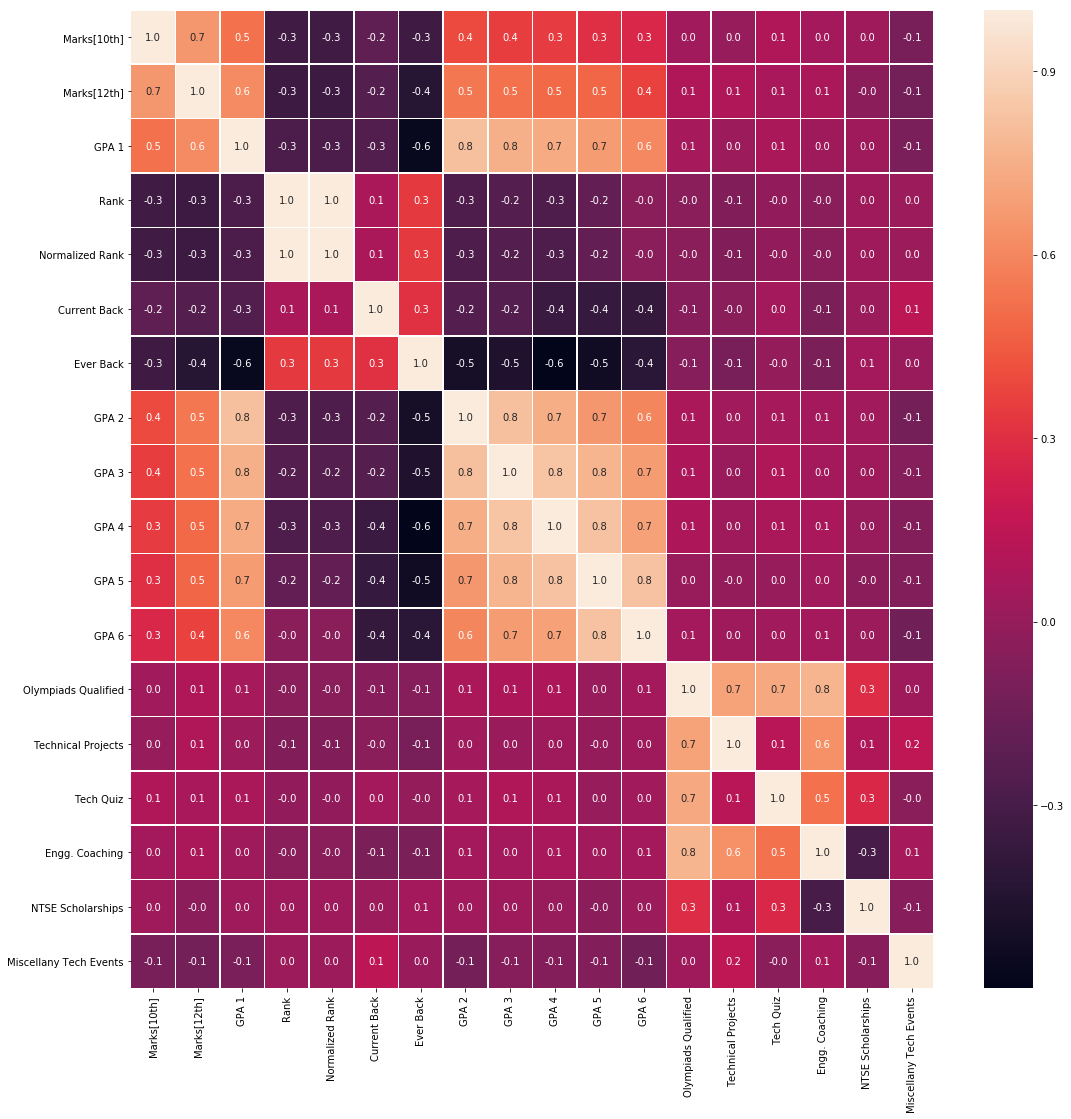

In [9]:
f,ax = plote.subplots(figsize=(18, 18))
sns.heatmap(features.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# dropping 'Rank' features as the dataset has already Normalised Rank feature(dropping not usefull data


In [10]:
features = features.drop(['Rank'], axis=1)

In [11]:
features.describe()

,Marks[10th],Marks[12th],GPA 1,Normalized Rank,Current Back,Ever Back,GPA 2,GPA 3,GPA 4,GPA 5,GPA 6,Olympiads Qualified,Technical Projects,Tech Quiz,Engg. Coaching,NTSE Scholarships,Miscellany Tech Events
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,84.294679,77.838119,7.231147,14.679875,0.073394,1.440367,6.974908,6.905321,6.991569,7.558360,7.563911,3.591743,1.857798,1.830275,2.963303,0.692661,1.472477
std,8.541319,9.027970,0.700450,12.565192,0.261383,2.663739,0.704570,0.750704,0.766016,0.961291,0.954523,2.106240,1.378892,1.385774,2.060945,1.341311,2.200057
min,53.700000,56.800000,5.760000,4.219286,0.000000,0.000000,5.760000,4.880000,4.900000,5.500000,4.560000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,79.000000,71.650000,6.710000,8.526161,0.000000,0.000000,6.432500,6.327500,6.455000,6.810000,6.872500,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,86.550000,79.100000,7.180000,10.580714,0.000000,0.000000,6.880000,6.820000,6.955000,7.630000,7.500000,4.000000,2.000000,2.000000,3.000000,0.000000,0.000000
75%,91.000000,85.350000,7.747500,14.675179,0.000000,2.000000,7.470000,7.407500,7.470000,8.250000,8.190000,5.000000,3.000000,3.000000,4.000000,1.000000,4.000000
max,96.600000,96.500000,9.120000,99.942500,1.000000,13.000000,9.350000,9.120000,9.180000,9.500000,9.810000,10.000000,5.000000,7.000000,10.000000,7.000000,5.000000


In [12]:
features.iloc[:,0:14].describe()

,Marks[10th],Marks[12th],GPA 1,Normalized Rank,Current Back,Ever Back,GPA 2,GPA 3,GPA 4
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,84.294679,77.838119,7.231147,14.679875,0.073394,1.440367,6.974908,6.905321,6.991569
std,8.541319,9.027970,0.700450,12.565192,0.261383,2.663739,0.704570,0.750704,0.766016
min,53.700000,56.800000,5.760000,4.219286,0.000000,0.000000,5.760000,4.880000,4.900000
25%,79.000000,71.650000,6.710000,8.526161,0.000000,0.000000,6.432500,6.327500,6.455000
50%,86.550000,79.100000,7.180000,10.580714,0.000000,0.000000,6.880000,6.820000,6.955000
75%,91.000000,85.350000,7.747500,14.675179,0.000000,2.000000,7.470000,7.407500,7.470000
max,96.600000,96.500000,9.120000,99.942500,1.000000,13.000000,9.350000,9.120000,9.180000


In [13]:
features.iloc[:,14:].describe()

,GPA 5,GPA 6,Olympiads Qualified,Technical Projects,Tech Quiz,Engg. Coaching,NTSE Scholarships,Miscellany Tech Events
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,7.558360,7.563911,3.591743,1.857798,1.830275,2.963303,0.692661,1.472477
std,0.961291,0.954523,2.106240,1.378892,1.385774,2.060945,1.341311,2.200057
min,5.500000,4.560000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.810000,6.872500,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,7.630000,7.500000,4.000000,2.000000,2.000000,3.000000,0.000000,0.000000
75%,8.250000,8.190000,5.000000,3.000000,3.000000,4.000000,1.000000,4.000000
max,9.500000,9.810000,10.000000,5.000000,7.000000,10.000000,7.000000,5.000000


# Making list of columns

In [14]:
list1 = []
for item in features.columns:
    item = item.replace("[","")
    item = item.replace("]","")
    list1.append(item)
    
features.columns = list1

In [15]:
list1

['Branch',
 'Marks10th',
 'Marks12th',
 'Gender',
 'Board10th',
 'Board12th',
 'Category',
 'GPA 1',
 'Normalized Rank',
 'Current Back',
 'Ever Back',
 'GPA 2',
 'GPA 3',
 'GPA 4',
 'GPA 5',
 'GPA 6',
 'Olympiads Qualified',
 'Technical Projects',
 'Tech Quiz',
 'Engg. Coaching',
 'NTSE Scholarships',
 'Miscellany Tech Events']

# Visualization

**vis_dataset is the combined dataset of features and the target(CGPA)**

In [16]:
#Combining features and CGPA(Target)
vis_dataset = pd.concat([features, target], axis = 1)

# Distplot
 plot shows the distribution of CGPA (target) in the dataset.

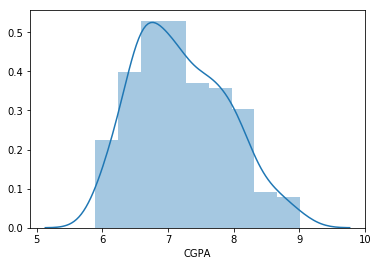

In [17]:
sns.distplot(target)

# Branchwise CGPA Distribution plot(between 0 and 1)

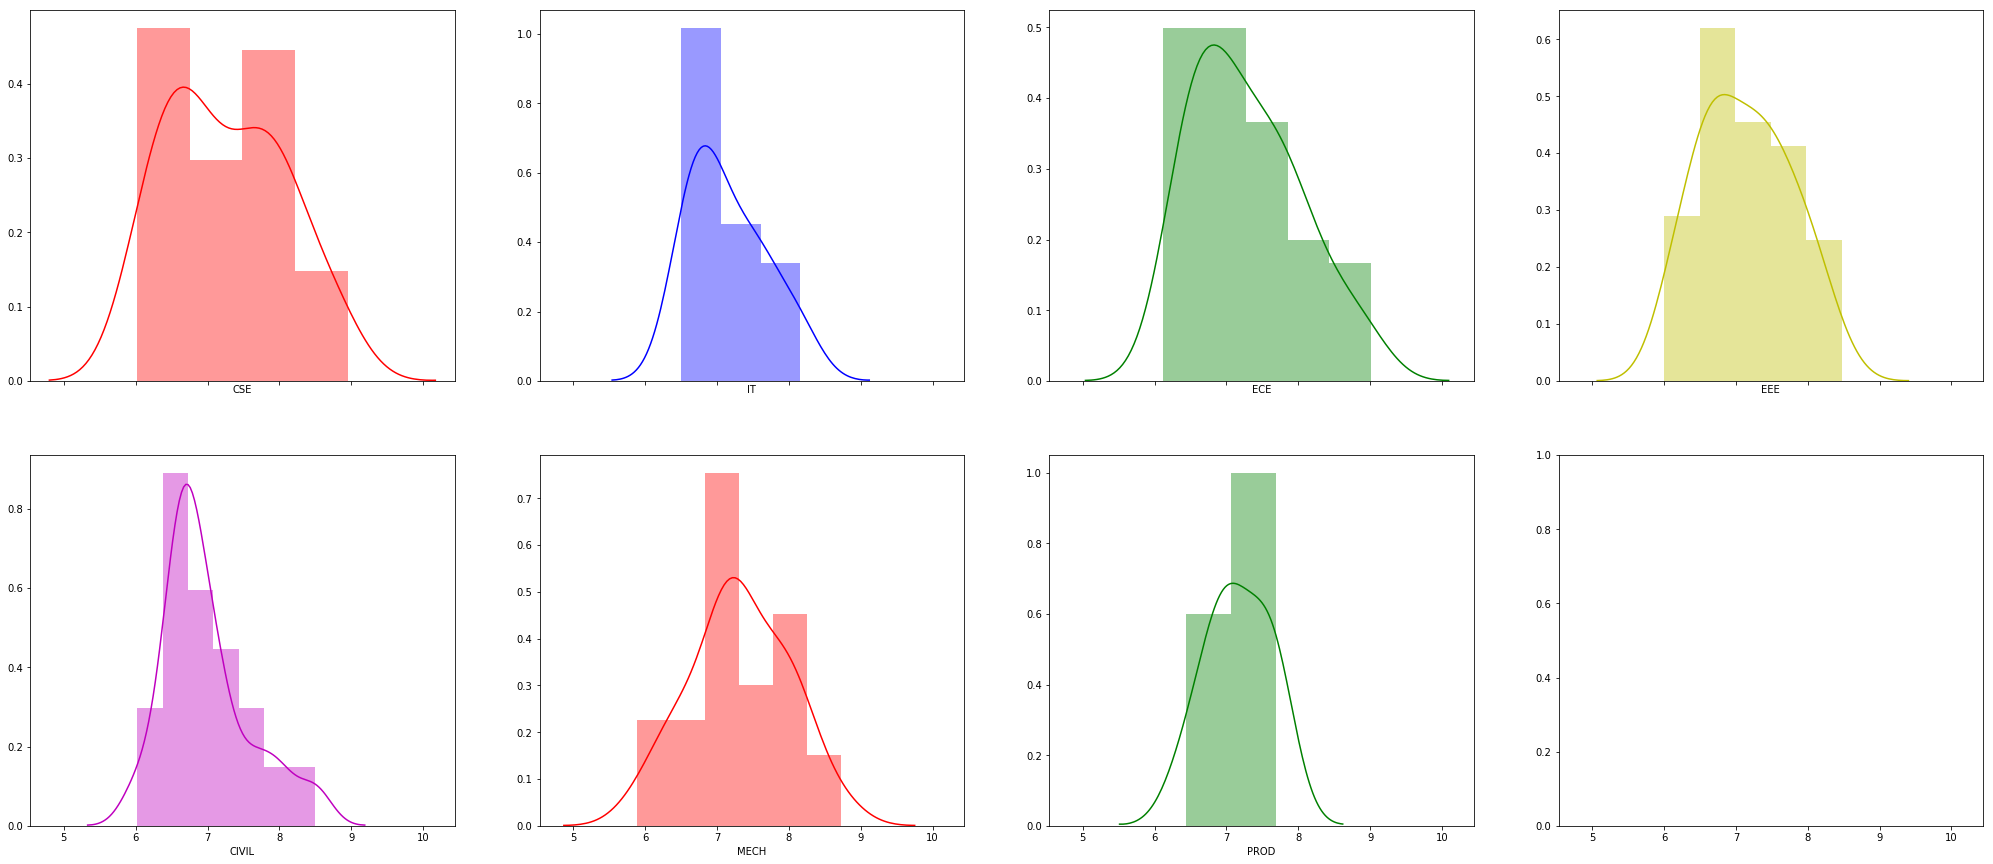

In [18]:
f, axes = plote.subplots(2, 4, figsize=(35, 15), sharex=True)
# CSE
d = vis_dataset.drop(vis_dataset[vis_dataset["Branch"]!="CSE"].index)
d = pd.Series(d.CGPA, name="CSE")
sns.distplot(d, color="r", ax=axes[0,0])
# IT
d = vis_dataset.drop(vis_dataset[vis_dataset["Branch"]!="IT"].index)
d = pd.Series(d.CGPA, name = "IT")
sns.distplot(d, color="b", ax=axes[0,1])
# ECE
d = vis_dataset.drop(vis_dataset[vis_dataset["Branch"]!="ECE"].index)
d = pd.Series(d.CGPA, name = "ECE")
sns.distplot(d, color="g", ax=axes[0,2])
# EEE
d = vis_dataset.drop(vis_dataset[vis_dataset["Branch"]!="EEE"].index)
d = pd.Series(d.CGPA, name = "EEE")
sns.distplot(d, color="y", ax=axes[0,3])
# CIVIL
d = vis_dataset.drop(vis_dataset[vis_dataset["Branch"]!="CIVIL"].index)
d = pd.Series(d.CGPA, name = "CIVIL")
sns.distplot(d, color="m", ax=axes[1,0])
# Mech
d = vis_dataset.drop(vis_dataset[vis_dataset["Branch"]!="MECH"].index)
d = pd.Series(d.CGPA, name = "MECH")
sns.distplot(d, color="r", ax=axes[1,1])
# Prod
d = vis_dataset.drop(vis_dataset[vis_dataset["Branch"]!="PROD"].index)
d = pd.Series(d.CGPA, name = "PROD")
sns.distplot(d, color="g", ax=axes[1,2])

# Conclusion
* Mech and CSE have widest range of distribution.
* CIVIL CGPA distribution is skewed leftwards.
* ECE and EEE have moderate and similar distribution.

# Gender wise CGPA Distribution plot

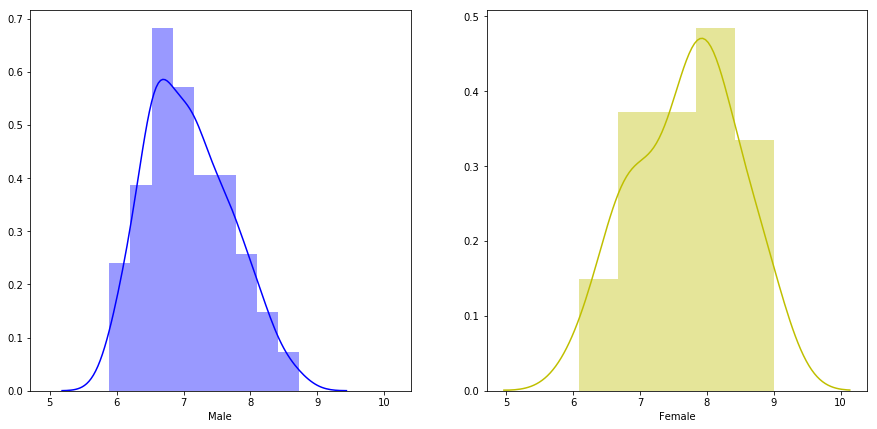

In [19]:
f, axes = plote.subplots(1, 2, figsize=(15, 7), sharex=True)
# Male
d = vis_dataset.drop(vis_dataset[vis_dataset["Gender"]!="Male"].index)
d = pd.Series(d.CGPA, name="Male")
sns.distplot(d, color="b", ax=axes[0])
# Fe
d = vis_dataset.drop(vis_dataset[vis_dataset["Gender"]!="Female"].index)
d = pd.Series(d.CGPA, name = "Female")
sns.distplot(d, color="y", ax=axes[1])

# Conclusion 
Girls are performing very well in semester exams -)

The Distribution of Male CGPA is leftwards skewed whereas the distribution of Female CGPA is rightwards skewed. CGPA distribution near 8-9 is greater for Female whereas the distribution near 7 is very large in Male.


# Category wise CGPA Distribution plot

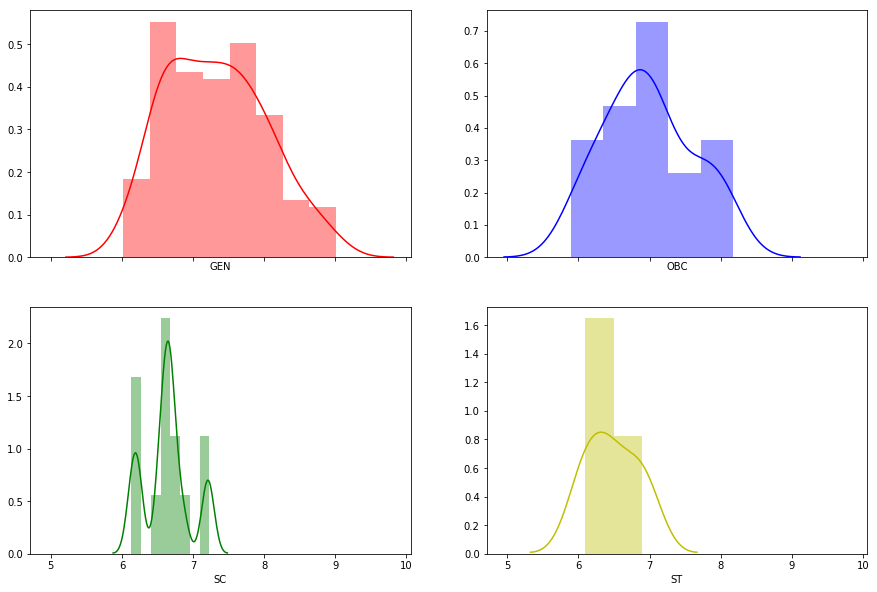

In [20]:
f, axes = plote.subplots(2, 2, figsize=(15, 10), sharex=True)
#General
d = vis_dataset.drop(vis_dataset[vis_dataset["Category"]!="GEN"].index)
d = pd.Series(d.CGPA, name="GEN")
sns.distplot(d, color="r", ax=axes[0,0])
# obc
d = vis_dataset.drop(vis_dataset[vis_dataset["Category"]!="OBC"].index)
d = pd.Series(d.CGPA, name = "OBC")
sns.distplot(d, color="b", ax=axes[0,1])
# sc
d = vis_dataset.drop(vis_dataset[vis_dataset["Category"]!="SC"].index)
d = pd.Series(d.CGPA, name = "SC")
sns.distplot(d, color="g", ax=axes[1,0])
# st
d = vis_dataset.drop(vis_dataset[vis_dataset["Category"]!="ST"].index)
d = pd.Series(d.CGPA, name = "ST")
sns.distplot(d, color="y", ax=axes[1,1])


# Pair Plot
The following plot pairs each and every attribute using scatter plot showing "Gender" distinction using different colors. The graphs in the diagonal represents distribution plot of each pair of features. These plots infer the pairs of attributes which can be used to distinguish Gender.


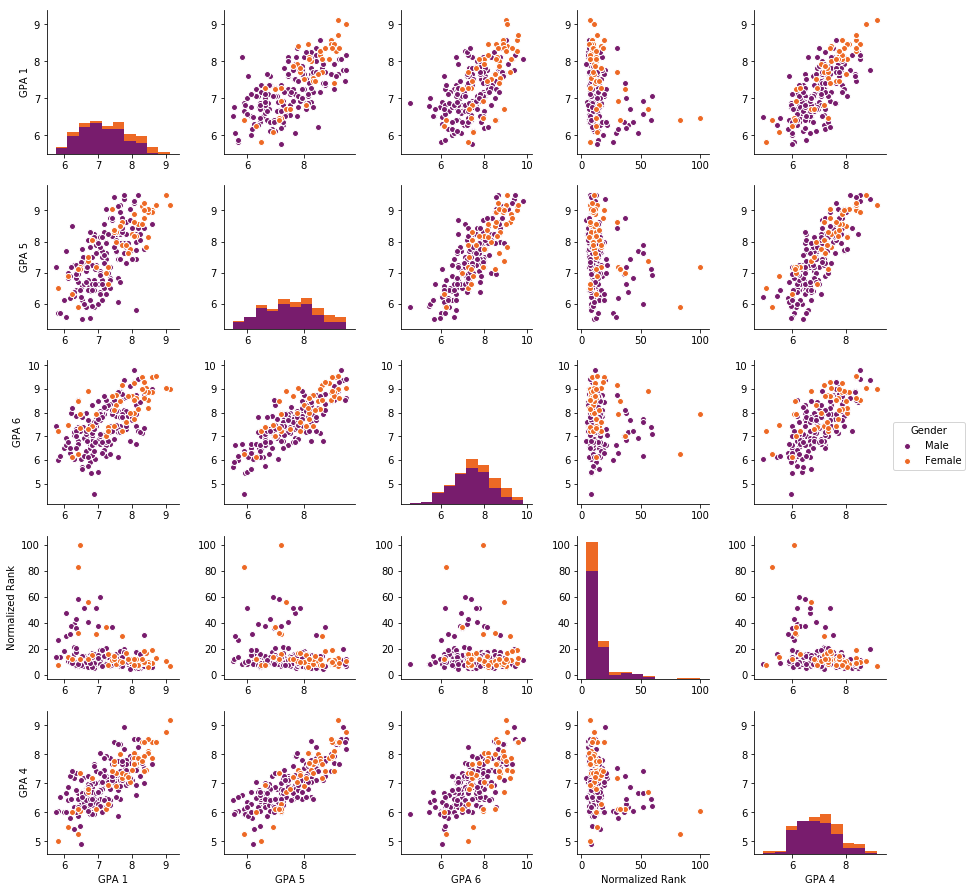

In [21]:
sns.reset_orig()
sns.pairplot(features[['GPA 1','GPA 5','GPA 6','Normalized Rank','GPA 4','Gender']],hue='Gender',palette='inferno')

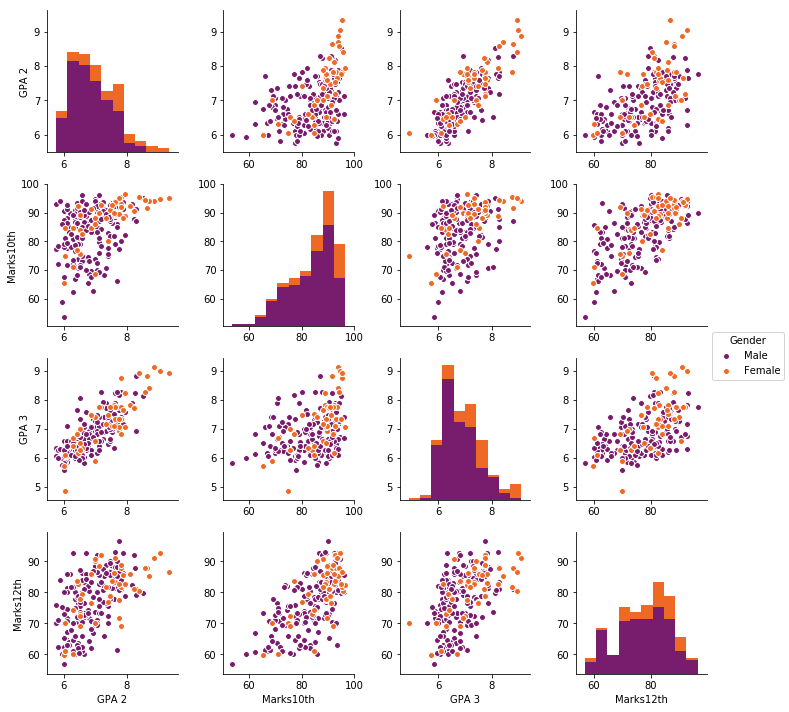

In [22]:
sns.pairplot(features[['GPA 2','Marks10th','GPA 3','Marks12th','Gender']],hue='Gender',palette='inferno')

# Violin Plot
Violin plot combines boxplot and kernel density estimate. It plays the same role as Box plot and whisker plot. The three quartile values are represented by dashed line in the both halves. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.


Both halves are separated easing out the comparision of the kernel density distribution and quartile values. They can also estimate outliers.

# Weak vs Average Students


In [23]:
vis_dataset.CGPA = vis_dataset.CGPA.apply(lambda x: int(x))
vis_dataset_WM = vis_dataset.drop(vis_dataset[vis_dataset['CGPA']>7].index)
vis_dataset_WM = vis_dataset_WM.drop(vis_dataset_WM[vis_dataset_WM['CGPA']<6].index)
optimal_features1 = ['GPA 1','GPA 2','GPA 3','GPA 4','GPA 5','GPA 6','CGPA']
optimal_features2 = ['Normalized Rank','Marks10th','Marks12th','CGPA']

Text(0.5,1,'Values of diff semester exams  ')

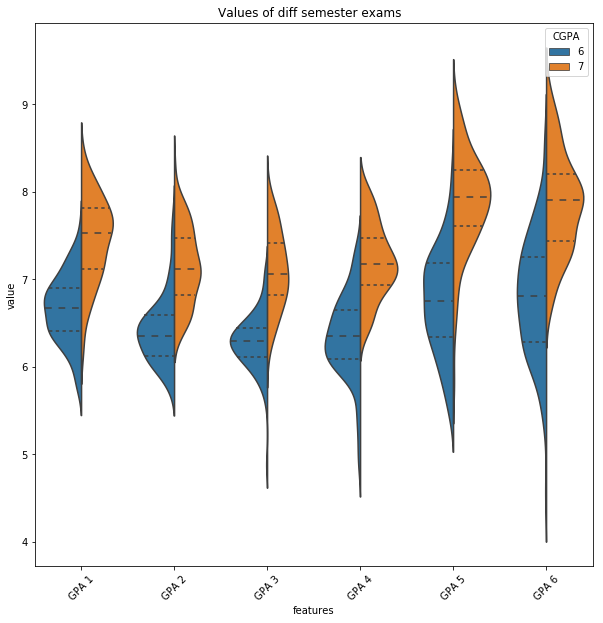

In [24]:
optimal_features2 = ['Normalized Rank','Marks10th','Marks12th','CGPA']
data_wa = pd.melt(vis_dataset_WM[optimal_features1],id_vars="CGPA",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="CGPA", data=data_wa,split=True, inner="quart")
plt.xticks(rotation=45)
plt.title("Values of diff semester exams  ")

Text(0.5,1,'Values of diff exams before coming to college  ')

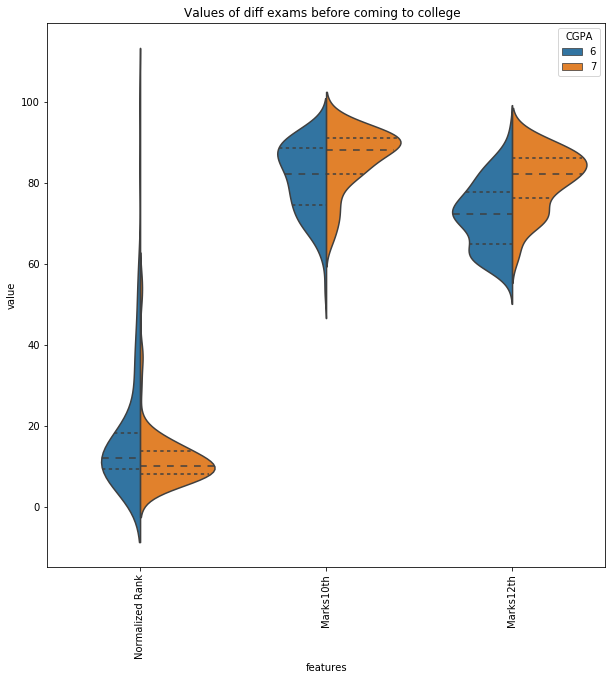

In [25]:
data_wa2 = pd.melt(vis_dataset_WM[optimal_features2],id_vars="CGPA",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="CGPA", data=data_wa2,split=True, inner="quart")
plt.xticks(rotation=90)
plt.title("Values of diff exams before coming to college  ")

# Average vs Good Students



In [26]:
vis_dataset_WM = vis_dataset.drop(vis_dataset[vis_dataset['CGPA']>8].index)
vis_dataset_WM = vis_dataset_WM.drop(vis_dataset_WM[vis_dataset_WM['CGPA']<7].index)

Text(0.5,1,'Values of diff exams')

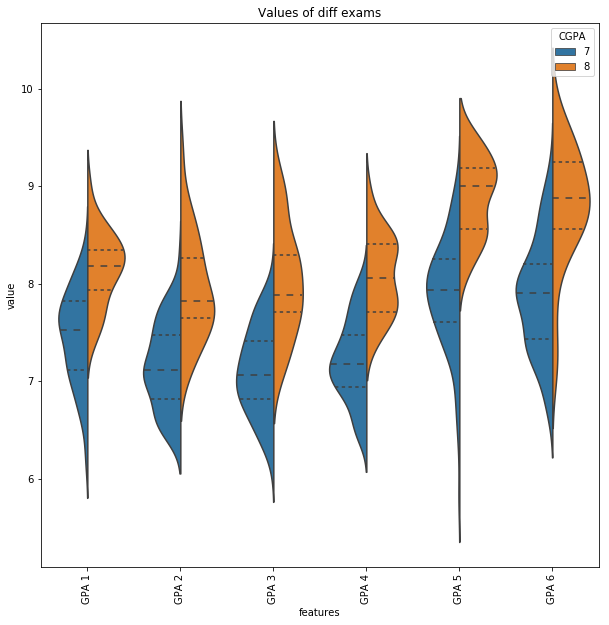

In [27]:
sns.reset_orig()
data_ag1 = pd.melt(vis_dataset_WM[optimal_features1],id_vars="CGPA",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="CGPA", data=data_ag1,split=True, inner="quart")
plt.xticks(rotation=90)
plt.title("Values of diff exams")

Text(0.5,1,'Values of diff exams before coming to college  ')

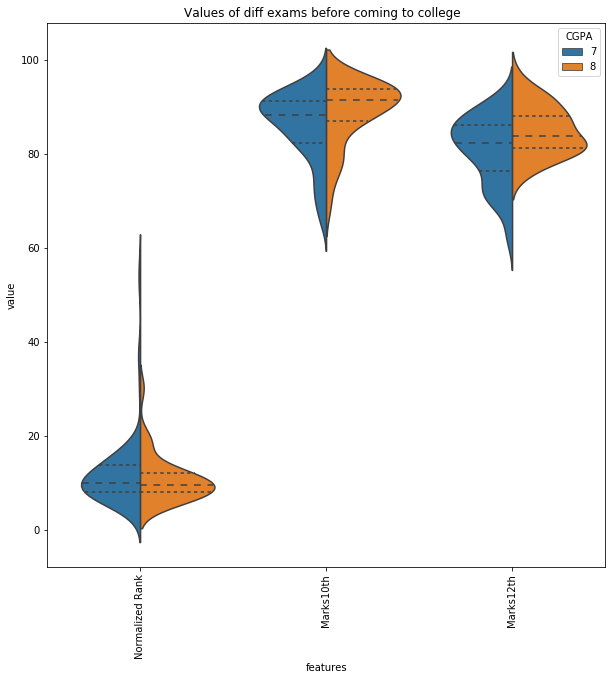

In [28]:
sns.reset_orig()
data_ag1 = pd.melt(vis_dataset_WM[optimal_features2],id_vars="CGPA",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="CGPA", data=data_ag1,split=True, inner="quart")
plt.xticks(rotation=90)
plt.title("Values of diff exams before coming to college  ")

# Branch and Gender Violin Plot


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

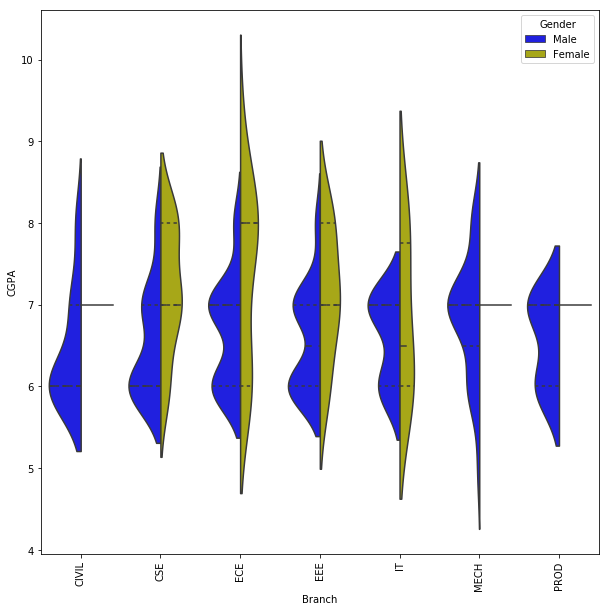

In [29]:
plt.figure(figsize=(10,10))
sns.violinplot(x="Branch", y="CGPA", hue="Gender", data=vis_dataset,split=True, inner="quart", palette={"Male": "b", "Female": "y"})
plt.xticks(rotation=90)

# Conclusion
The range of CGPA distribution is higher for Female in ECE and IT whereas the range is almost the same for CSE and EEE. The skewed nature of distribution as shown in Distribution plot is highlighted in CSE plot. For some Branches the upper or lower quartile values merges with the boundary. This happens due to skewed nature of kernel density distribution. For CIVIL Kernel density distribution is highly skewed merging the lower quartile value with the lower boundary. The same can be verified by the distribution plot.



# Swarm Plot
A swarm plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution. The distribution contrasts level of students using different colors. Outliers can be monitored by spotting values lying at distance with main distribution.



**Weak vs Average Students**

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

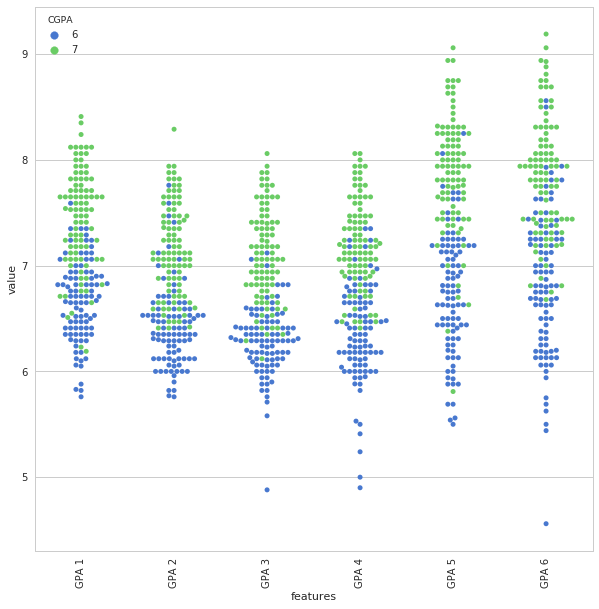

In [30]:
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="CGPA", data=data_wa)
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

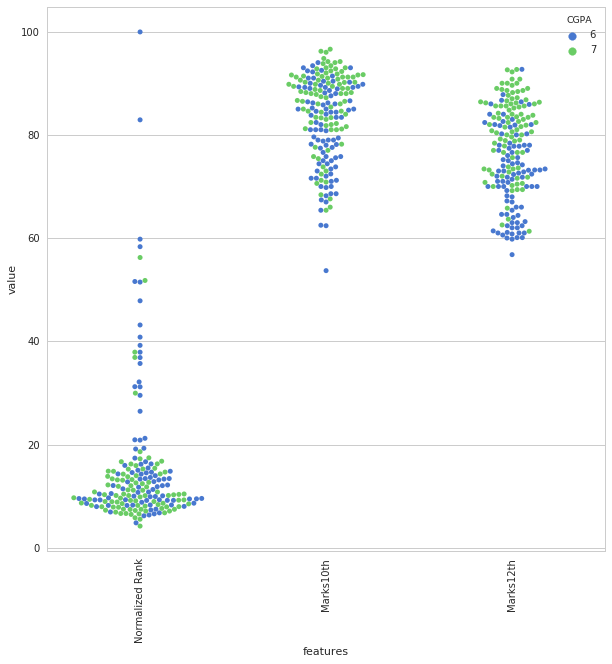

In [31]:
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="CGPA", data=data_wa2)
plt.xticks(rotation=90)

# Branch-wise distribution of CGPA


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

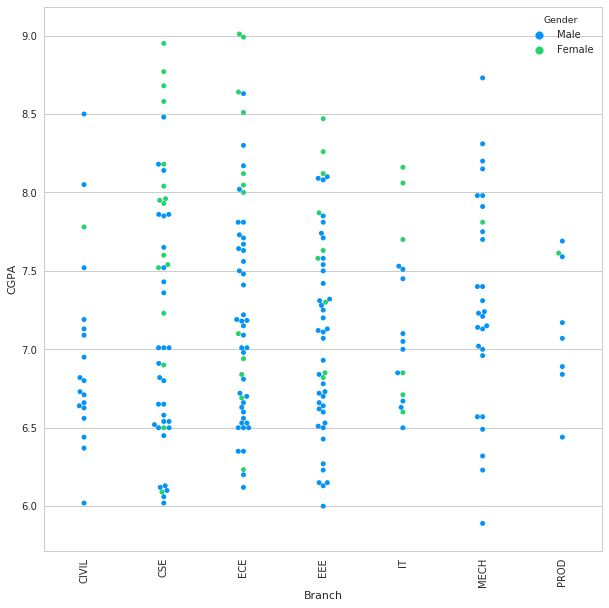

In [32]:
features_swarm = ['GPA 1','GPA 5','GPA 6','GPA 4','GPA 2','GPA 3','CGPA', 'Branch']
sns.set(style="whitegrid", palette="terrain")
vis_dataset = pd.concat([features, target], axis = 1)
plt.figure(figsize=(10,10))
sns.swarmplot(x="Branch", y="CGPA", hue="Gender", data=vis_dataset)
plt.xticks(rotation=90)

# Conclusion
The distribution of CGPA for CSE and ECE have a wider range followed by EEE. IT and Production have a narrower range of distribution. The is small gap between the range 6.1-6.5 and 8.2-8.5 CGPA in CSE. ECE has a minor discontinuity in distribution. IT has major gap in the range of 7.1-7.5 and 8.1-8.5 CGPA. There are very few points above 7.5 For CIVIL the major distribution region is 6.4-7.2. Rest have very few numbers of points. Mech has almost same distribution except for a major gap in the range 6.6-7 CGPA.

# Test Train Split


In [33]:
X_train, X_test, y_train, y_test = train_test_split(features, target ,test_size=0.3, random_state=7)

# Encoding


In [34]:
obj_features = features.loc[:, features.dtypes == np.object]
obj_features_columns = obj_features.columns
features[obj_features_columns] = features[obj_features_columns].apply(preprocessing.LabelEncoder().fit_transform)

# Extreme Gradient Boosting regression


In [35]:
import xgboost as xgb
xgb = xgb.XGBRegressor()


In [36]:
xgb.fit(X_train,y_train)
predictions_xgb = xgb.predict(X_test)


ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields Branch, Gender, Board10th, Board12th, Category

In [37]:
error_xgb = metrics.mean_squared_error(y_test, predictions_xgb)
print(error_xgb)

NameError: name 'predictions_xgb' is not defined